In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import contextlib

This file is the Report for Task 4 of week 2. All important tasks are performed in the Fortran files. Only the plotting is done in Python.
For detailed information about the implementation, see the Fortran file.

First of all, let's define some handy functions:

In [10]:
# Function to read the data from the file
def read_data(file_name = 'task3_res.txt'):
    file_path = os.path.join(os.getcwd(), file_name)

    # Initialize empty lists to store the data
    numerical_derivatives = []
    analytical_derivatives = []
    errors = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Process each line
        count = 0
        for line in lines:
            # Split the line into words
            parts = line.split()
            
            # Skip the first four words ("Numerical 2nd derivative:", etc.) and convert the rest to floats
            if count == 1:
                numerical_derivatives = [float(value) for value in parts]
            elif count == 3:
                analytical_derivatives = [float(value) for value in parts]
            elif count == 5:
                errors = [np.abs(float(value)) for value in parts]

            count += 1


    return np.asarray(numerical_derivatives), np.asarray(analytical_derivatives), np.asarray(errors)



In [11]:
# Function to plot the numerical and analytical derivatives
def ploting(numerical_derivatives, analytical_derivatives, errors):
    # Index array for x-axis
    index_array = np.arange(len(numerical_derivatives))

    #interpolate the analytical derivatives
    x = np.arange(0, len(analytical_derivatives))
    y = analytical_derivatives
    x_new = np.arange(0, len(analytical_derivatives), 0.1)

    # Perform cubic interpolation on the analytical derivatives
    cs = CubicSpline(x, y)
    y_new = cs(x_new)



    # Plot numerical and analytical derivatives
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot

    plt.scatter(index_array, numerical_derivatives, label='Numerical Derivatives', marker='x')
    plt.scatter(index_array, analytical_derivatives, label='Analytical Derivatives', marker='x')
    plt.plot(x_new, y_new, label='Interpolated Analytical Derivatives', linestyle='dashed')
    plt.title('Numerical vs Analytical Derivatives')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    # Plot the errors
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.scatter(index_array[1:-1], errors[1:-1], label='Error', color='red', marker='o')
    #plt.plot(errors[1:-1], label='Error', color='red', marker='o')
    plt.title('Error in Derivatives')
    plt.xlabel('Datapoint Index')
    plt.ylabel('Error Value')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [12]:
# Function to suppress console output
@contextlib.contextmanager
def suppress_stdout_stderr():
    # Open a null file
    with open(os.devnull, 'w') as null_file:
        # Save the current stdout and stderr
        old_stdout, old_stderr = os.dup(1), os.dup(2)
        # Replace stdout and stderr with the null file
        os.dup2(null_file.fileno(), 1)
        os.dup2(null_file.fileno(), 2)
        try:
            # Yield control back to the context
            yield
        finally:
            # Restore stdout and stderr
            os.dup2(old_stdout, 1)
            os.dup2(old_stderr, 2)
            os.close(old_stdout)
            os.close(old_stderr)

Execute with poly function:

 Enter the number of grid points (n):
 Enter the grid spacing (h):
 numerical 2nd derivative:
   0.00000000      0.499999940       1.10000014       1.93999922       3.02000022       4.33999729       5.90001011       7.69999552       9.73998260       12.0200148       14.5399799       17.3000565       20.2998619       23.5401134       27.0200233       30.7398777       34.7001038       38.8996086       43.3403931       48.0205498       52.9388390       58.1003151       63.5002098       69.1398544       75.0209732       81.1389847       87.4988480       94.1032333       100.936882       108.022301       115.338890       122.897331       130.703720       138.737473       147.022995       155.535873       164.298996       173.307785       182.531723       192.019638       201.754745       211.682114       221.902451       232.339462       243.023666       253.948959       265.081757       276.507538       288.140839       300.012177       312.170380       324.475067       337.103241       34

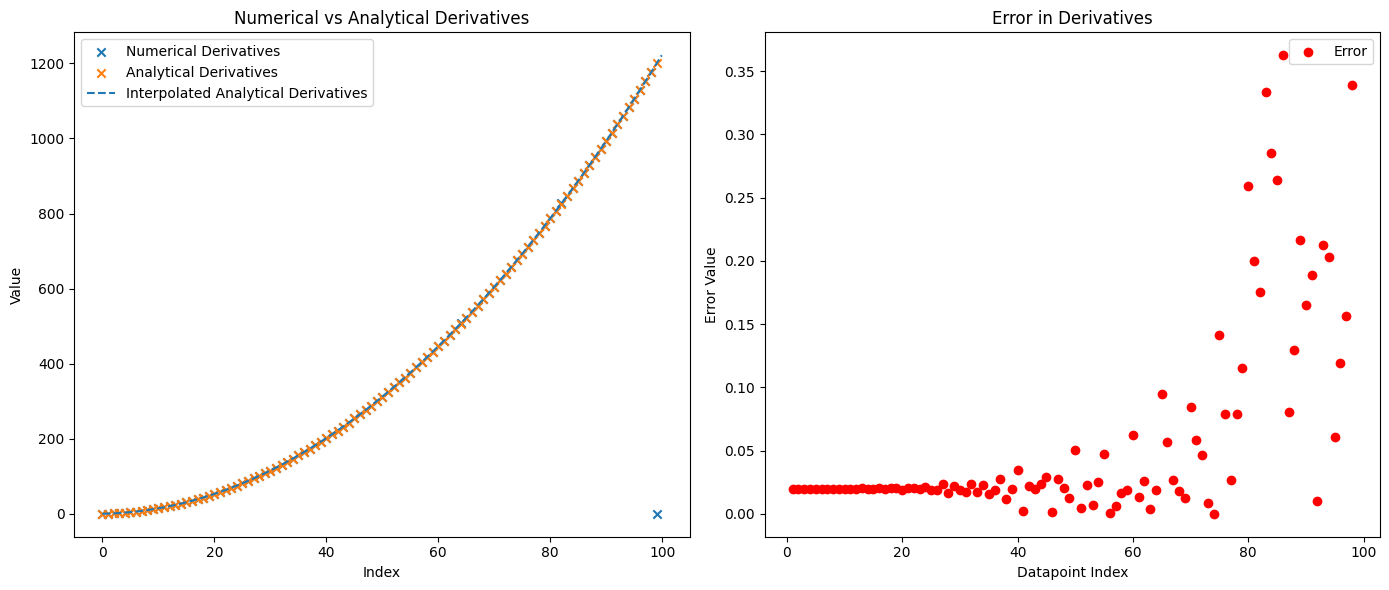

In [13]:
# Compile the Fortran program
os.system('gfortran -o task3 task3.f90')

# Define the input variables as a multi-line string
n_points = 100
grid_spacing = .1
inputs = f'{n_points}\n{grid_spacing}\n'

# Execute the Fortran program with the inputs
os.system(f'echo "{inputs}" | ./task3')

numerical_derivatives, analytical_derivatives, errors = read_data()
ploting(numerical_derivatives, analytical_derivatives, errors)


Analayse the error of the numerical derivatives with varying grid spacing

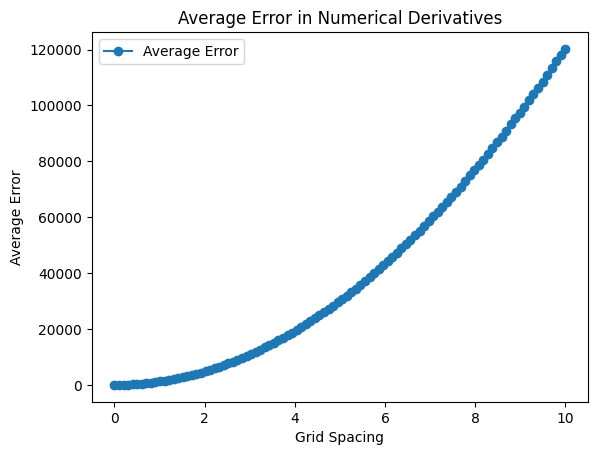

In [14]:
n_points = 100
avg_errors = []



n_points_grod = 100
grid_spacings = np.linspace(0.001, 10, n_points_grod)
avg_errors = []

for grid_spacing in grid_spacings:
    inputs = f'{n_points}\n{grid_spacing}\n'
    with suppress_stdout_stderr():
        os.system(f'echo "{inputs}" | ./task3')
    numerical_derivatives, analytical_derivatives, errors = read_data()
    avg_errors.append(np.mean(errors))

plt.plot(grid_spacings, avg_errors, label='Average Error', marker='o')
plt.title('Average Error in Numerical Derivatives')
plt.xlabel('Grid Spacing')
plt.ylabel('Average Error')
plt.legend()
plt.show()

Results for: 
$f(x) = x⁴$

The results indicate that the derivative calculations, both numerical and analytical, align quie well. The absolute error increases with the function values.

Execute with Sin Function:


 Enter the number of grid points (n):
 Enter the grid spacing (h):
 numerical 2nd derivative:
   0.00000000     -0.198501334     -0.295278400     -0.389090151     -0.479024619     -0.564175785     -0.643676460     -0.716757715     -0.782680452     -0.840759218     -0.890475452     -0.931256950     -0.962758005     -0.984626949     -0.996673048     -0.998741329     -0.990843713     -0.973033845     -0.945514381     -0.908541620     -0.862485111     -0.807815731     -0.745099723     -0.674891412     -0.597983539     -0.515055597     -0.427022547     -0.334732205     -0.239028022     -0.141023830      -4.15231995E-02   5.83261214E-02  0.157588705      0.255352229      0.350469321      0.442171067      0.529396474      0.611323059      0.687217653      0.756168306      0.817573011      0.870871484      0.915402114      0.950807273      0.976717412      0.992852390      0.999098957      0.995337903      0.981622875      0.958126724      0.925069988      0.882691085      0.831574142      0.7

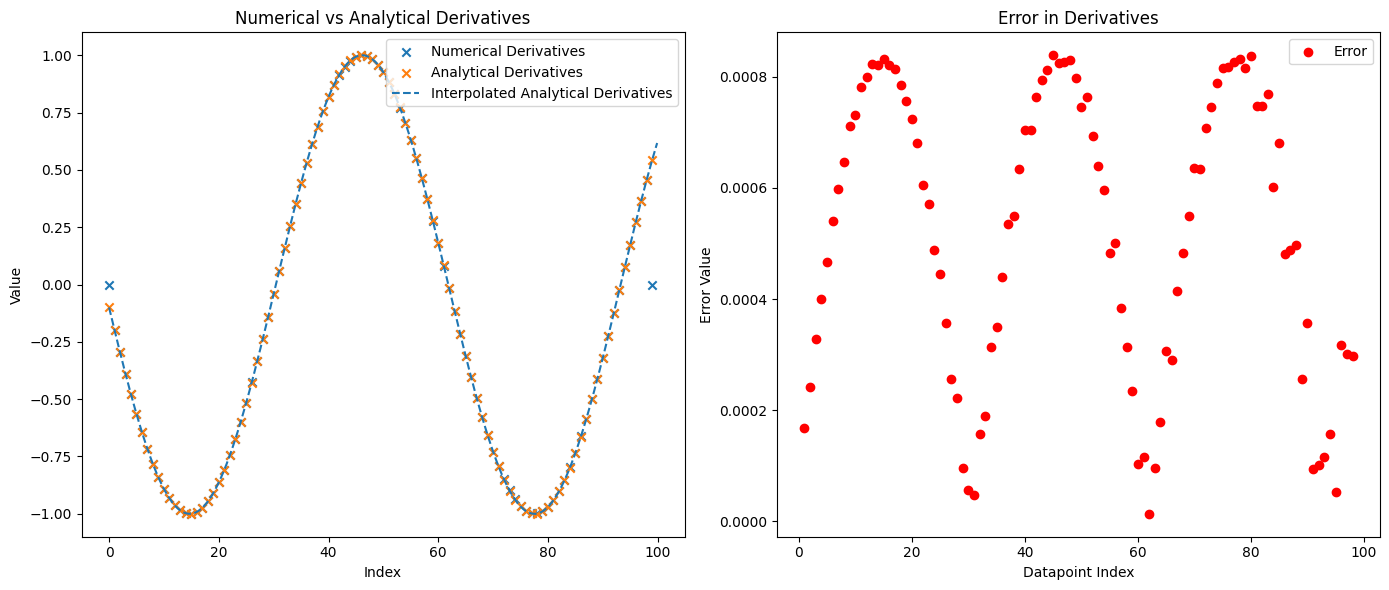

In [7]:
# Compile the Fortran program
os.system('gfortran -o task3 task3.f90')

# Define the input variables as a multi-line string
n_points = 100
grid_spacing = .1
inputs = f'{n_points}\n{grid_spacing}\n'

# Execute the Fortran program with the inputs
os.system(f'echo "{inputs}" | ./task3')


numerical_derivatives, analytical_derivatives, errors = read_data()
ploting(numerical_derivatives, analytical_derivatives, errors)

Both the sin and the polyfunction work just as aspected.


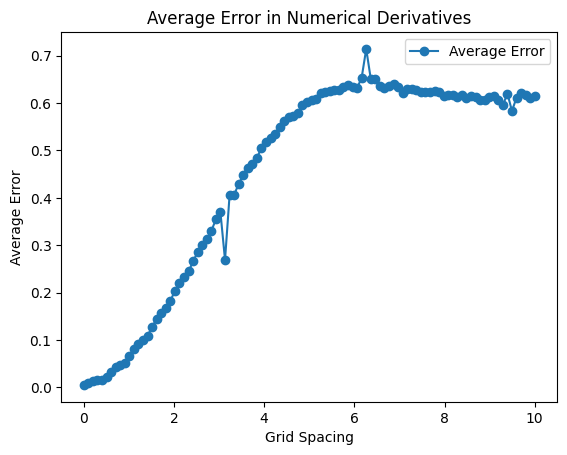

In [8]:
n_points = 100
avg_errors = []



n_points_grod = 100
grid_spacings = np.linspace(0.001, 10, n_points_grod)
avg_errors = []

for grid_spacing in grid_spacings:
    inputs = f'{n_points}\n{grid_spacing}\n'
    with suppress_stdout_stderr():
        os.system(f'echo "{inputs}" | ./task3')
    numerical_derivatives, analytical_derivatives, errors = read_data()
    avg_errors.append(np.mean(errors))

plt.plot(grid_spacings, avg_errors, label='Average Error', marker='o')
plt.title('Average Error in Numerical Derivatives')
plt.xlabel('Grid Spacing')
plt.ylabel('Average Error')
plt.legend()
plt.show()